### Time Series analysis
### dataset is the export price of Vietnamse 5% broken rice from 2004 to 2022
### the aim is to explore the data and predict the price in the next 12 months

In [2]:
library(zoo)
library(forecast)



Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
# 1. read file
df = read.csv('data/Export_rice_prices_5percent_broken_vn.csv')

In [4]:
# quick view 
head(df)

,date,price
,<chr>,<dbl>
1,1/1/2004,198.82
2,2/1/2004,204.07
3,3/1/2004,225.80
4,4/1/2004,240.71
5,5/1/2004,236.14
6,6/1/2004,230.74


In [5]:
tail(df)

,date,price
,<chr>,<dbl>
220,4/1/2022,402.38
221,5/1/2022,406.45
222,6/1/2022,411.92
223,7/1/2022,411.09
224,8/1/2022,395.80
225,9/1/2022,391.78


In [6]:
str(df)

'data.frame':	225 obs. of  2 variables:
 $ date : chr  "1/1/2004" "2/1/2004" "3/1/2004" "4/1/2004" ...
 $ price: num  199 204 226 241 236 ...


In [7]:
summary(df)

     date               price      
 Length:225         Min.   :198.8  
 Class :character   1st Qu.:341.0  
 Mode  :character   Median :386.9  
                    Mean   :386.3  
                    3rd Qu.:431.1  
                    Max.   :780.0  

In [8]:
# 3. convert to Datetime
df$date <- as.Date(df$date)   
head(df)

,date,price
,<date>,<dbl>
1,0001-01-20,198.82
2,0002-01-20,204.07
3,0003-01-20,225.80
4,0004-01-20,240.71
5,0005-01-20,236.14
6,0006-01-20,230.74


In [9]:
### convert to timeseries
tseries <- read.zoo(df)
tseries

Warning message in zoo(rval3, ix):
"some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique"


0001-01-20 0001-01-20 0001-01-20 0001-01-20 0001-01-20 0001-01-20 0001-01-20 
  198.8200   255.3200   263.8600   298.0525   451.4286   386.7900   485.2800 
0001-01-20 0001-01-20 0001-01-20 0001-01-20 0001-01-20 0001-01-20 0001-01-20 
  493.8600   451.4300   401.2400   402.0000   374.4200   364.9100   336.5500 
0001-01-20 0001-01-20 0001-01-20 0001-01-20 0001-01-20 0002-01-20 0002-01-20 
  380.9400   396.3100   348.6800   490.9800   395.9400   204.0700   265.6400 
0002-01-20 0002-01-20 0002-01-20 0002-01-20 0002-01-20 0002-01-20 0002-01-20 
  264.2900   303.0000   517.1429   418.0900   421.7800   478.5700   430.4300 
0002-01-20 0002-01-20 0002-01-20 0002-01-20 0002-01-20 0002-01-20 0002-01-20 
  401.6400   393.1600   353.5000   360.1300   335.3400   395.4300   367.9500 
0002-01-20 0002-01-20 0002-01-20 0003-01-20 0003-01-20 0003-01-20 0003-01-20 
  357.4200   500.4800   384.2100   225.8000   262.9200   244.8600   304.9300 
0003-01-20 0003-01-20 0003-01-20 0003-01-20 0003-01-20 0003-01-2

In [10]:
### convert to timeseries by month, start from 2004
ts.price = ts(tseries, frequency = 12, start = c(2004,1))
ts.price

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2004,198.8200,255.3200,263.8600,298.0525,451.4286,386.7900,485.2800,493.8600,451.4300,401.2400,402.0000,374.4200
2005,364.9100,336.5500,380.9400,396.3100,348.6800,490.9800,395.9400,204.0700,265.6400,264.2900,303.0000,517.1429
2006,418.0900,421.7800,478.5700,430.4300,401.6400,393.1600,353.5000,360.1300,335.3400,395.4300,367.9500,357.4200
2007,500.4800,384.2100,225.8000,262.9200,244.8600,304.9300,582.8571,424.0450,392.5700,464.0000,428.7500,401.6100
2008,378.5700,360.7400,360.2000,343.5600,409.9200,342.6200,372.5800,498.3800,391.6700,240.7100,259.9200,244.2500
2009,302.2500,648.5714,430.0000,371.1700,484.2900,440.7200,390.7600,370.9100,354.0200,371.0000,344.6500,413.4300
2010,341.1100,407.1400,488.1700,402.3800,236.1400,256.1400,256.2300,300.3600,714.2857,405.1800,368.8200,479.6400
2011,433.2900,386.8500,390.4800,351.0000,377.3100,345.0000,419.0000,350.9400,438.4200,477.7000,406.4500,230.7400
2012,241.4900,259.4300,302.4900,780.0000,404.2800,358.2200,475.2800,411.9600,385.9300,404.5000,349.0000,372.4600
2013,357.1800,443.1000,358.8200,449.4600,474.0000,411.9200,228.9600,237.2800,257.4300,302.7100,698.0000,410.2300


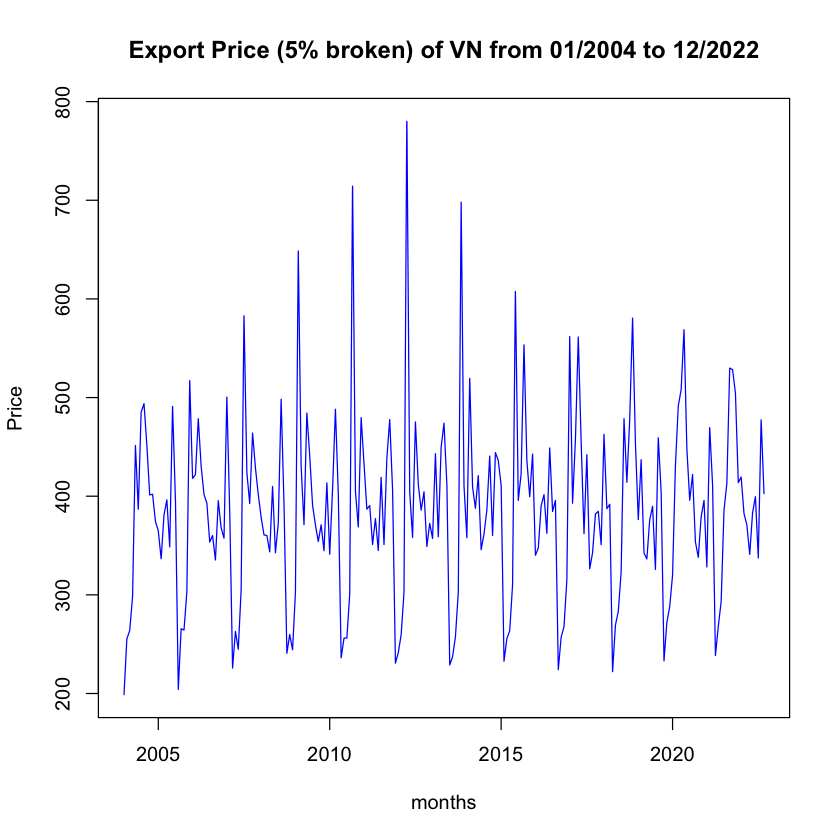

In [11]:
# 4. visualize the data
plot.ts(ts.price, main = 'Export Price (5% broken) of VN from 01/2004 to 12/2022', ylab = 'Price', xlab='months', col='blue')

In [12]:
# 5. 
comp = decompose(ts.price)

In [13]:
comp$x

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2004,198.8200,255.3200,263.8600,298.0525,451.4286,386.7900,485.2800,493.8600,451.4300,401.2400,402.0000,374.4200
2005,364.9100,336.5500,380.9400,396.3100,348.6800,490.9800,395.9400,204.0700,265.6400,264.2900,303.0000,517.1429
2006,418.0900,421.7800,478.5700,430.4300,401.6400,393.1600,353.5000,360.1300,335.3400,395.4300,367.9500,357.4200
2007,500.4800,384.2100,225.8000,262.9200,244.8600,304.9300,582.8571,424.0450,392.5700,464.0000,428.7500,401.6100
2008,378.5700,360.7400,360.2000,343.5600,409.9200,342.6200,372.5800,498.3800,391.6700,240.7100,259.9200,244.2500
2009,302.2500,648.5714,430.0000,371.1700,484.2900,440.7200,390.7600,370.9100,354.0200,371.0000,344.6500,413.4300
2010,341.1100,407.1400,488.1700,402.3800,236.1400,256.1400,256.2300,300.3600,714.2857,405.1800,368.8200,479.6400
2011,433.2900,386.8500,390.4800,351.0000,377.3100,345.0000,419.0000,350.9400,438.4200,477.7000,406.4500,230.7400
2012,241.4900,259.4300,302.4900,780.0000,404.2800,358.2200,475.2800,411.9600,385.9300,404.5000,349.0000,372.4600
2013,357.1800,443.1000,358.8200,449.4600,474.0000,411.9200,228.9600,237.2800,257.4300,302.7100,698.0000,410.2300


In [14]:
comp$trend
### No trend 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2004,NA,NA,NA,NA,NA,NA,378.7955,389.1005,397.3634,406.3358,406.1487,406.2088
2005,406.8275,391.0304,371.2146,357.7671,347.9358,349.7576,357.9202,363.6873,371.3065,376.7961,380.4244,378.5552
2006,372.7111,377.4452,386.8519,395.2202,403.3907,399.4418,396.2196,398.0871,385.9896,368.4779,354.9658,344.7571
2007,350.6374,362.8571,367.9048,373.1464,378.5368,382.9114,379.6731,373.6156,378.2377,387.1977,397.4352,405.8831
2008,398.6920,393.0277,396.0875,386.7463,370.4079,356.8167,347.0800,355.8930,370.7943,374.8530,379.1022,386.2885
2009,391.1335,386.5797,379.6997,383.5597,392.5189,403.0985,411.7668,403.3263,395.6904,399.4146,390.3754,372.3450
2010,359.0488,350.5037,362.5752,379.0105,381.4417,385.2076,391.8071,394.8026,389.8867,383.6755,387.4167,397.0013
2011,407.4859,416.3755,406.9886,398.5158,403.1054,394.3025,375.9400,362.6392,353.6637,367.8725,386.8713,388.5458
2012,391.4417,396.3292,396.6846,391.4475,386.0037,389.5150,400.2404,412.7137,422.7138,411.2883,400.4208,405.5633
2013,397.5375,379.9958,367.3633,357.7679,368.0683,384.1837,385.7858,388.9958,394.2800,393.8108,389.0254,384.0558


In [15]:
comp$seasonal
## co tinh seasonal:
## Tang vao thang cuoi nam cho den nhung thang dau nam sau... va giam dan....

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2004,-4.57986713,14.31336039,-2.83847824,7.64510729,-10.26263781,-4.10861820,-0.06780198,-1.92459431,13.87607037,-14.82778297,8.62620099,-5.85095840
2005,-4.57986713,14.31336039,-2.83847824,7.64510729,-10.26263781,-4.10861820,-0.06780198,-1.92459431,13.87607037,-14.82778297,8.62620099,-5.85095840
2006,-4.57986713,14.31336039,-2.83847824,7.64510729,-10.26263781,-4.10861820,-0.06780198,-1.92459431,13.87607037,-14.82778297,8.62620099,-5.85095840
2007,-4.57986713,14.31336039,-2.83847824,7.64510729,-10.26263781,-4.10861820,-0.06780198,-1.92459431,13.87607037,-14.82778297,8.62620099,-5.85095840
2008,-4.57986713,14.31336039,-2.83847824,7.64510729,-10.26263781,-4.10861820,-0.06780198,-1.92459431,13.87607037,-14.82778297,8.62620099,-5.85095840
2009,-4.57986713,14.31336039,-2.83847824,7.64510729,-10.26263781,-4.10861820,-0.06780198,-1.92459431,13.87607037,-14.82778297,8.62620099,-5.85095840
2010,-4.57986713,14.31336039,-2.83847824,7.64510729,-10.26263781,-4.10861820,-0.06780198,-1.92459431,13.87607037,-14.82778297,8.62620099,-5.85095840
2011,-4.57986713,14.31336039,-2.83847824,7.64510729,-10.26263781,-4.10861820,-0.06780198,-1.92459431,13.87607037,-14.82778297,8.62620099,-5.85095840
2012,-4.57986713,14.31336039,-2.83847824,7.64510729,-10.26263781,-4.10861820,-0.06780198,-1.92459431,13.87607037,-14.82778297,8.62620099,-5.85095840
2013,-4.57986713,14.31336039,-2.83847824,7.64510729,-10.26263781,-4.10861820,-0.06780198,-1.92459431,13.87607037,-14.82778297,8.62620099,-5.85095840


In [16]:
comp$random
### Trong tung nam deu co su tang giam dot bien

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2004,NA,NA,NA,NA,NA,NA,106.5522960,106.6840884,40.1905070,9.7319645,-12.7748915,-25.9377916
2005,-37.3376329,-68.7937771,12.5638949,30.8978094,11.0068045,145.3309992,38.0875639,-157.6927271,-119.5425585,-97.6782885,-86.0506058,144.4385774
2006,49.9587957,30.0214015,94.5565735,27.5646546,8.5119830,-2.1731675,-42.6517814,-36.0324890,-64.5256537,41.7798663,4.3579657,18.5138751
2007,154.4224862,7.0395860,-139.2662837,-117.8715359,-123.4142074,-73.8728104,203.2518496,52.3539991,0.4562511,91.6301044,22.6886204,1.5778632
2008,-15.5420972,-46.6010687,-33.0490218,-50.8313573,49.7747211,-10.0880485,25.5678020,144.4116181,6.9996439,-119.3152527,-127.8084034,-136.1874940
2009,-84.3035853,247.6783658,53.1387759,-20.0348097,102.0337688,41.7301658,-20.9389837,-30.4917152,-55.5464870,-13.5868004,-54.3516177,46.9359584
2010,-13.3588829,42.3228896,128.4332401,15.7244165,-135.0390884,-124.9589413,-135.5093409,-92.5179652,310.5229177,36.3323068,-27.2229272,88.4896489
2011,30.3839743,-43.8388366,-13.6700932,-55.1609406,-15.5327789,-45.1938818,43.1278020,-9.7745724,70.8801796,124.6552830,10.9525490,-151.9548749
2012,-145.3717995,-151.2125271,-91.3561051,380.9073927,28.5388878,-27.1863818,75.1073853,1.1708443,-50.6598204,8.0394496,-60.0470343,-27.2523749
2013,-35.7776329,48.7908063,-5.7048551,84.0469760,116.1943045,31.8448682,-156.7580314,-149.7912390,-150.7260704,-76.2730504,300.3483823,32.0251251


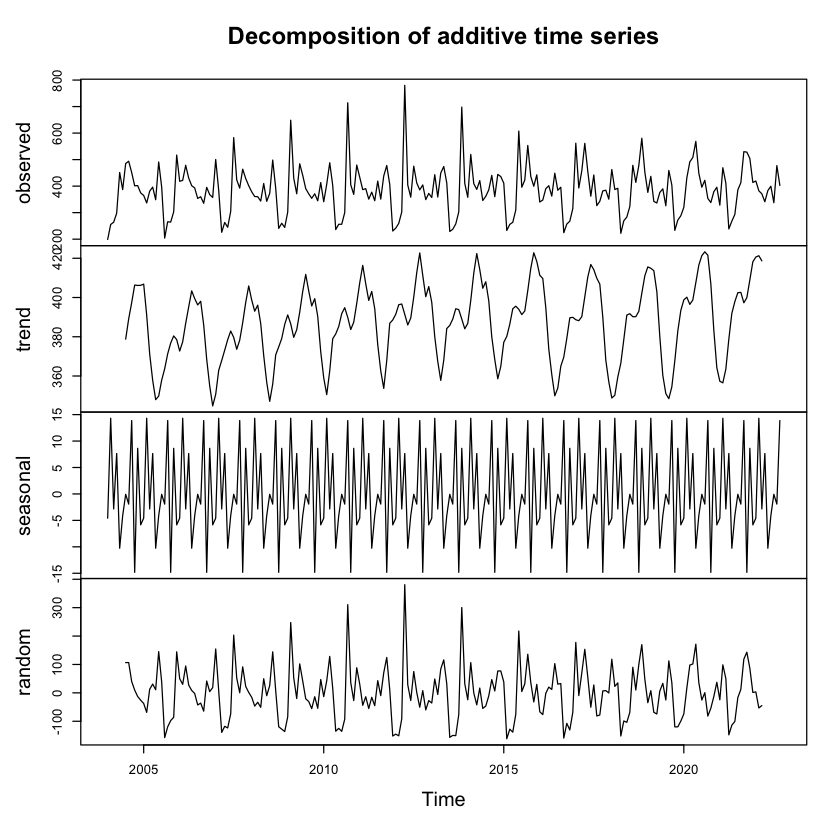

In [17]:
plot(comp)

In [18]:
# 6.
HWES.forecast = HoltWinters(log(ts.price))
HWES.forecast

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = log(ts.price))

Smoothing parameters:
 alpha: 0.6090558
 beta : 0
 gamma: 0.1860209

Coefficients:
           [,1]
a    5.86422031
b   -0.01177692
s1   0.05215976
s2   0.07178866
s3  -0.02539981
s4  -0.05575619
s5  -0.06367904
s6  -0.08394493
s7  -0.08117875
s8  -0.03700054
s9   0.06359449
s10  0.09930253
s11  0.19093746
s12  0.15141182

In [1]:
HWES.forecast$SSE

ERROR: Error in eval(expr, envir, enclos): object 'HWES.forecast' not found


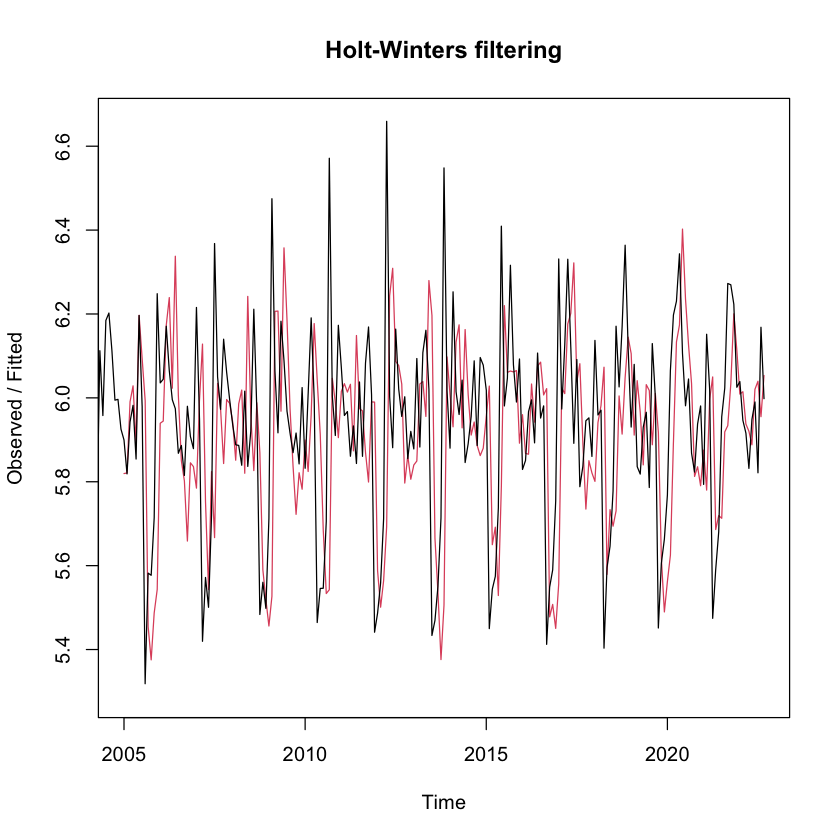

In [20]:
plot(HWES.forecast)

In [21]:
# 7. 
HWES.forecast.new = forecast:::forecast.HoltWinters(HWES.forecast,h=12)
print(HWES.forecast.new)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2022       5.904603 5.552239 6.256967 5.365709 6.443498
Nov 2022       5.912455 5.499881 6.325030 5.281477 6.543434
Dec 2022       5.803490 5.338436 6.268544 5.092251 6.514728
Jan 2023       5.761356 5.249173 6.273540 4.978039 6.544674
Feb 2023       5.741657 5.186328 6.296985 4.892355 6.590958
Mar 2023       5.709614 5.114260 6.304968 4.799098 6.620130
Apr 2023       5.700603 5.067749 6.333457 4.732737 6.668470
May 2023       5.733004 5.064752 6.401257 4.711001 6.755008
Jun 2023       5.821823 5.119955 6.523690 4.748408 6.895237
Jul 2023       5.845754 5.111808 6.579699 4.723281 6.968226
Aug 2023       5.925612 5.160933 6.690290 4.756137 7.095086
Sep 2023       5.874309 5.080086 6.668532 4.659650 7.088968


In [22]:
x = data.frame(HWES.forecast.new)
x$Forecast = exp(x$Point.Forecast)
x

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95,Forecast
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Oct 2022,5.904603,5.552239,6.256967,5.365709,6.443498,366.7217
Nov 2022,5.912455,5.499881,6.325030,5.281477,6.543434,369.6125
Dec 2022,5.803490,5.338436,6.268544,5.092251,6.514728,331.4542
Jan 2023,5.761356,5.249173,6.273540,4.978039,6.544674,317.7791
Feb 2023,5.741657,5.186328,6.296985,4.892355,6.590958,311.5802
Mar 2023,5.709614,5.114260,6.304968,4.799098,6.620130,301.7545
Apr 2023,5.700603,5.067749,6.333457,4.732737,6.668470,299.0477
May 2023,5.733004,5.064752,6.401257,4.711001,6.755008,308.8959
Jun 2023,5.821823,5.119955,6.523690,4.748408,6.895237,337.5868


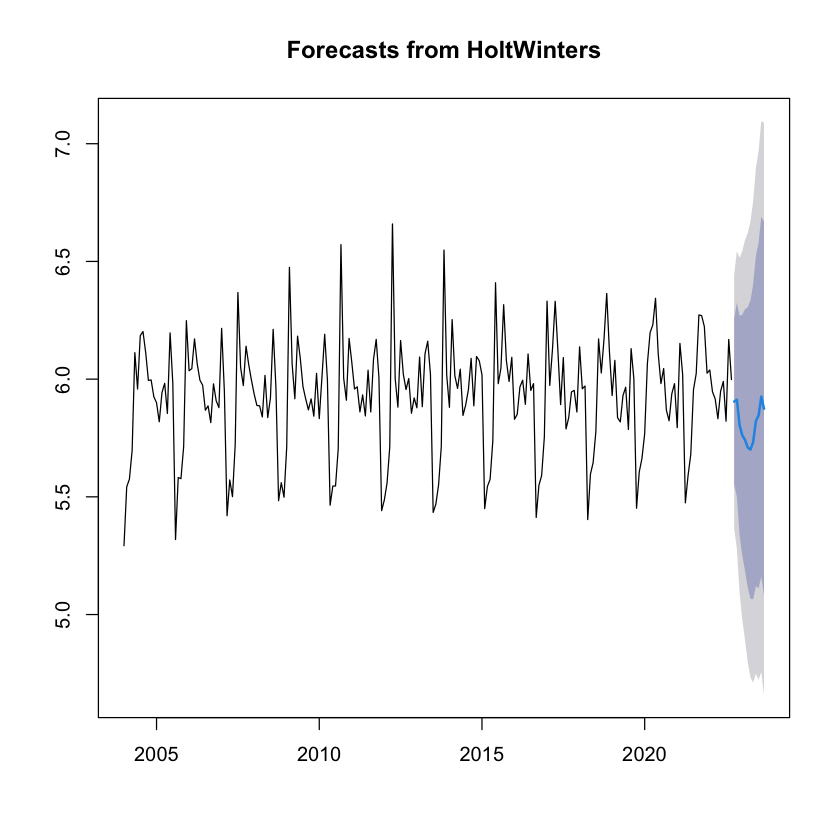

In [23]:
plot(HWES.forecast.new)

### nhan xet:
- duong du bao mau xanh da co tinh seasonal 
- tuy nhien khoang tin cay low and high van con dang kha xa.